In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv',index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
x=df.iloc[:,:-1]
y=df['Species']

In [5]:
le=LabelEncoder()

y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
dt=DecisionTreeClassifier(criterion='entropy')

In [8]:
dt.fit(xtrain,ytrain)

ypred=dt.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [9]:
print('Training accuracy:', dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training accuracy: 1.0
Testing Accuracy: 0.9666666666666667


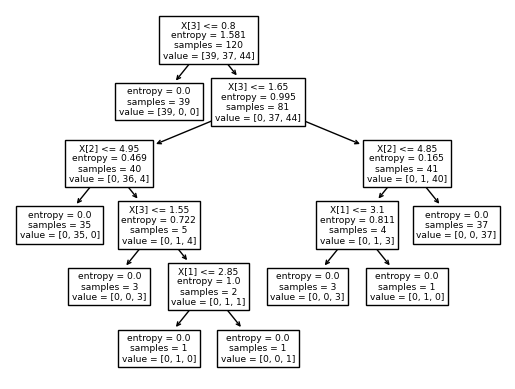

In [10]:
tree.plot_tree(dt)
plt.show()

In [11]:
plt.rcParams['figure.figsize']=(10,20)
plt.rcParams['figure.dpi']=250

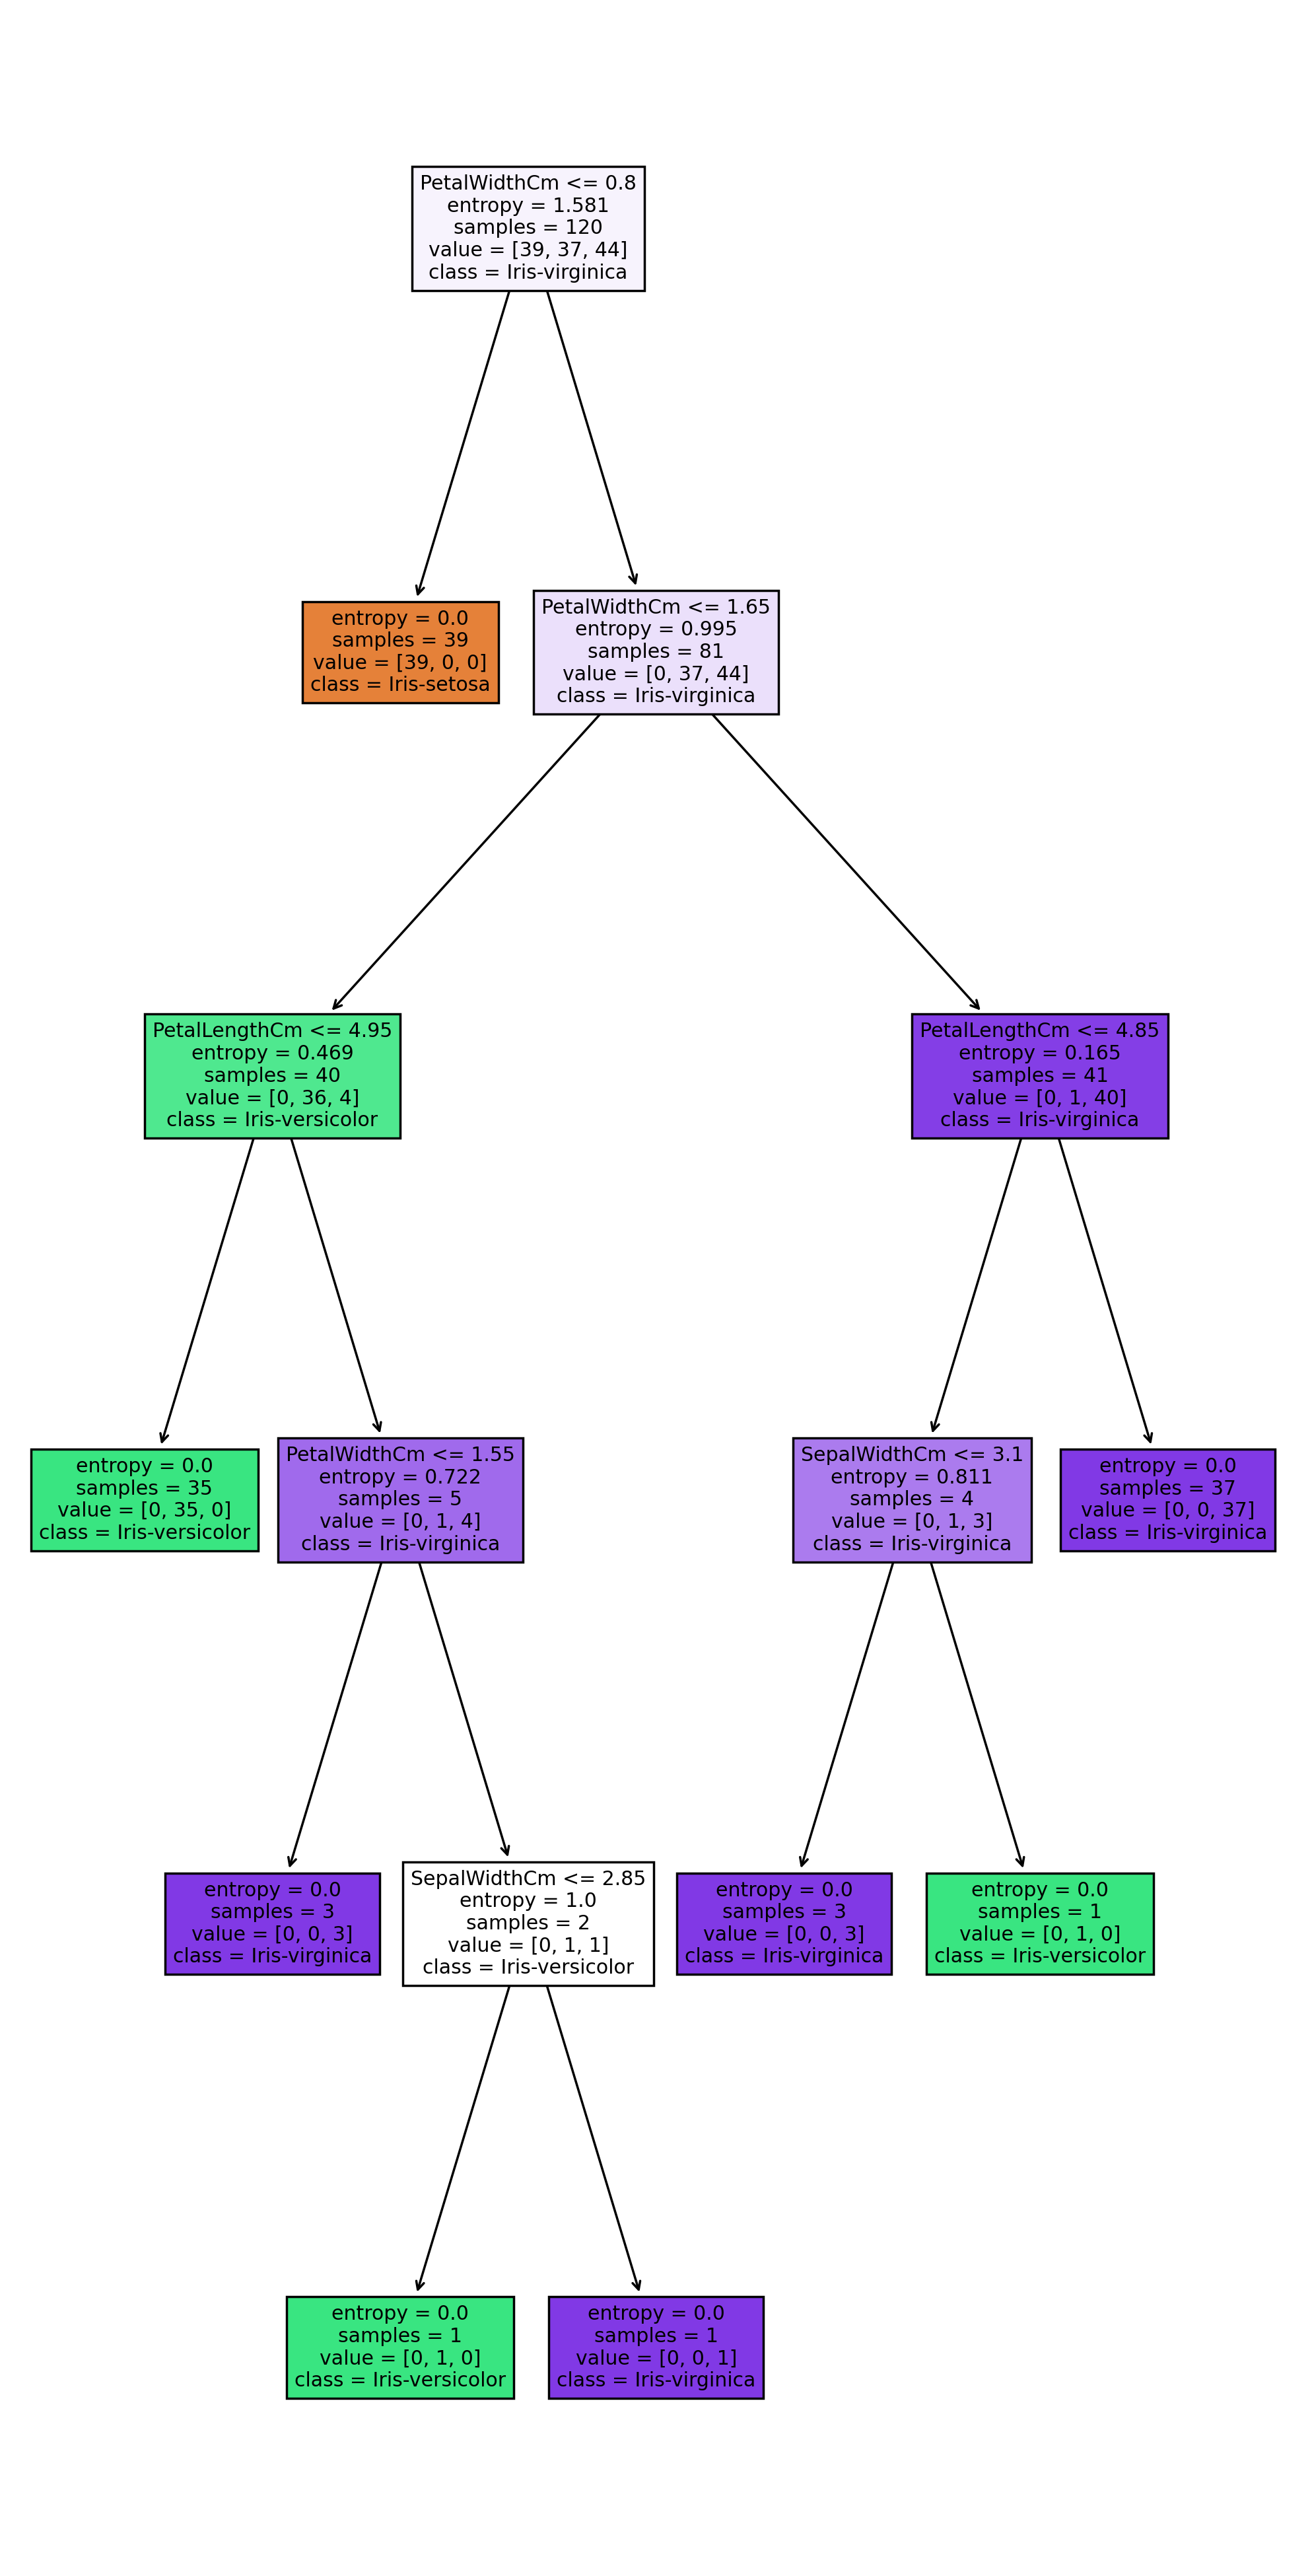

In [12]:
tree.plot_tree(dt,feature_names=x.columns,
              class_names=df['Species'].unique(),
              filled=True)
plt.show()

In [13]:
dt.feature_importances_

array([0.        , 0.02764493, 0.09849491, 0.87386016])

In [14]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [15]:
df['Species']

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object